# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_name = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city_name not in cities:
        cities.append(city_name)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city_name in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city_name}" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city_name))
#     print(f"Processing Record {record_count} of Set {set_count} | {city_name}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        resp = requests.get(city_url)
        city_weather = resp.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(f"Total city found: {len(city_data)}")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | igarka
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | shanhecun
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | tolanaro
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | sirte
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | zarah sharan
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | usogorsk
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | bor
Processing Record 20 of Set 1 | shetpe
Processing Record 21 of Set 1 | ar rutbah
Processing Record 22 of Set 1 | ilulissat
Processing Reco

Processing Record 39 of Set 4 | soio
Processing Record 40 of Set 4 | sishilichengzi
City not found. Skipping...
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | kajaani
Processing Record 43 of Set 4 | vega de alatorre
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | arvika
Processing Record 46 of Set 4 | kottayam
Processing Record 47 of Set 4 | sofifi
City not found. Skipping...
Processing Record 48 of Set 4 | ad dilam
Processing Record 49 of Set 4 | chibougamau
Processing Record 0 of Set 5 | esmeraldas
Processing Record 1 of Set 5 | shimoda
Processing Record 2 of Set 5 | west bay
Processing Record 3 of Set 5 | klyuchi
Processing Record 4 of Set 5 | crane
Processing Record 5 of Set 5 | umm kaddadah
Processing Record 6 of Set 5 | seguela
Processing Record 7 of Set 5 | udachny
Processing Record 8 of Set 5 | port elizabeth
Processing Record 9 of Set 5 | kavieng
Processing Record 10 of Set 5 | sangerhausen
Processing Record 11 of Set 5 | jinch

Processing Record 31 of Set 8 | keuruu
Processing Record 32 of Set 8 | batam
City not found. Skipping...
Processing Record 33 of Set 8 | mana
Processing Record 34 of Set 8 | kerikeri
Processing Record 35 of Set 8 | sao sepe
Processing Record 36 of Set 8 | miles city
Processing Record 37 of Set 8 | muynoq
Processing Record 38 of Set 8 | alta
Processing Record 39 of Set 8 | san salvador de jujuy
Processing Record 40 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 41 of Set 8 | trairi
Processing Record 42 of Set 8 | lindale
Processing Record 43 of Set 8 | kitimat
Processing Record 44 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 45 of Set 8 | poplar bluff
Processing Record 46 of Set 8 | porto novo
Processing Record 47 of Set 8 | mata-utu
Processing Record 48 of Set 8 | as safirah
Processing Record 49 of Set 8 | apaseo el alto
Processing Record 0 of Set 9 | valparaiso
Processing Record 1 of Set 9 | woodlake
Processing Record 2 of Set 9 | merizo vill

Processing Record 17 of Set 12 | tisul'
Processing Record 18 of Set 12 | moree
Processing Record 19 of Set 12 | milton-freewater
Processing Record 20 of Set 12 | waingapu
Processing Record 21 of Set 12 | lerwick
Processing Record 22 of Set 12 | saldanha
Processing Record 23 of Set 12 | tra vinh
Processing Record 24 of Set 12 | kulia village
City not found. Skipping...
Processing Record 25 of Set 12 | sunne
Processing Record 26 of Set 12 | kavaratti
Processing Record 27 of Set 12 | queseria
Processing Record 28 of Set 12 | markdorf
Processing Record 29 of Set 12 | nkurenkuru
City not found. Skipping...
Processing Record 30 of Set 12 | stephenville
Processing Record 31 of Set 12 | puerto madryn
Processing Record 32 of Set 12 | romanovka
Processing Record 33 of Set 12 | hammel
Processing Record 34 of Set 12 | aasiaat
Processing Record 35 of Set 12 | port isabel
Processing Record 36 of Set 12 | ascension
Processing Record 37 of Set 12 | menongue
Processing Record 38 of Set 12 | tanrake vil

In [6]:
# Convert the cities weather data into a Pandas DataFrame
print(len(city_data))
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

561


City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,igarka,67.4667,86.5833,18.92,83,89,5.25,RU,1689823961
1,waitangi,-43.9535,-176.5597,11.57,88,100,2.68,NZ,1689824008
2,codrington,-38.2667,141.9667,8.49,90,100,6.87,AU,1689824009
3,atafu village,-8.5421,-172.5159,28.11,79,51,6.06,TK,1689824009
4,shanhecun,44.7000,127.2000,28.98,68,22,3.02,CN,1689824009


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,igarka,67.4667,86.5833,18.92,83,89,5.25,RU,1689823961
1,waitangi,-43.9535,-176.5597,11.57,88,100,2.68,NZ,1689824008
2,codrington,-38.2667,141.9667,8.49,90,100,6.87,AU,1689824009
3,atafu village,-8.5421,-172.5159,28.11,79,51,6.06,TK,1689824009
4,shanhecun,44.7000,127.2000,28.98,68,22,3.02,CN,1689824009


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

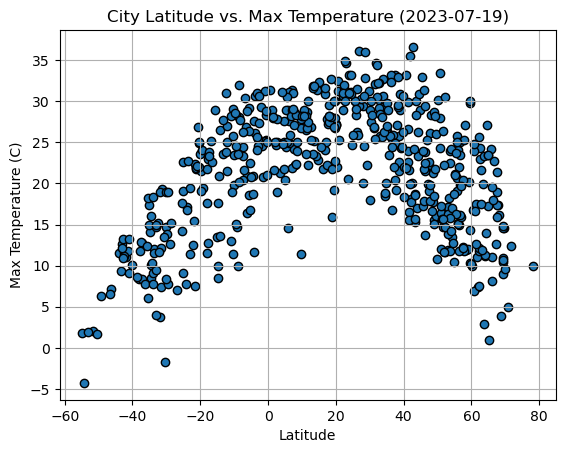

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-07-19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

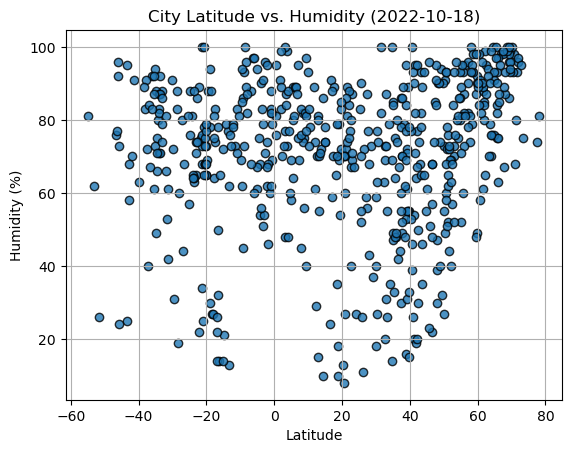

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

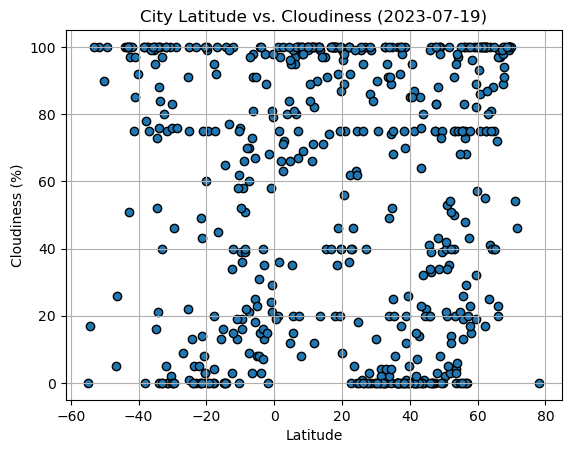

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

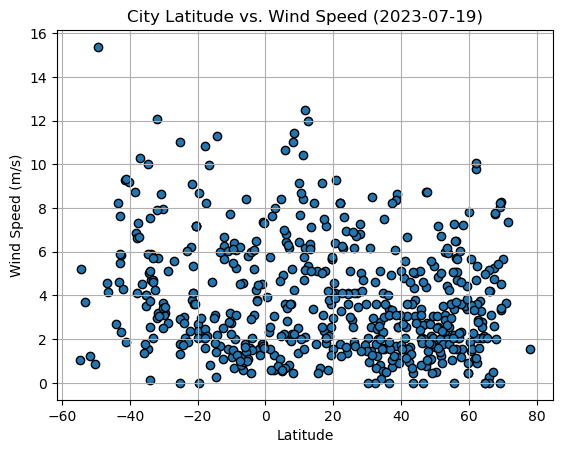

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression_scatter(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-value is: {rvalue}")
    equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    new_y_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, new_y_values, "r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(equation,(x_values.min()+1,y_values.min()+1),fontsize=15,color="red")
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,igarka,67.4667,86.5833,18.92,83,89,5.25,RU,1689823961
4,shanhecun,44.7000,127.2000,28.98,68,22,3.02,CN,1689824009
6,ribeira grande,38.5167,-28.7000,22.65,85,100,0.89,PT,1689824009
8,isafjordur,66.0755,-23.1240,8.08,83,23,0.25,IS,1689824010
9,sirte,31.2089,16.5887,26.78,79,0,2.57,LY,1689824010


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,11.57,88,100,2.68,NZ,1689824008
2,codrington,-38.2667,141.9667,8.49,90,100,6.87,AU,1689824009
3,atafu village,-8.5421,-172.5159,28.11,79,51,6.06,TK,1689824009
5,port-aux-francais,-49.3500,70.2167,6.30,96,100,15.37,TF,1689824009
7,tolanaro,-25.0319,46.9987,19.04,94,75,0.00,MG,1689824010


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5913204436353953


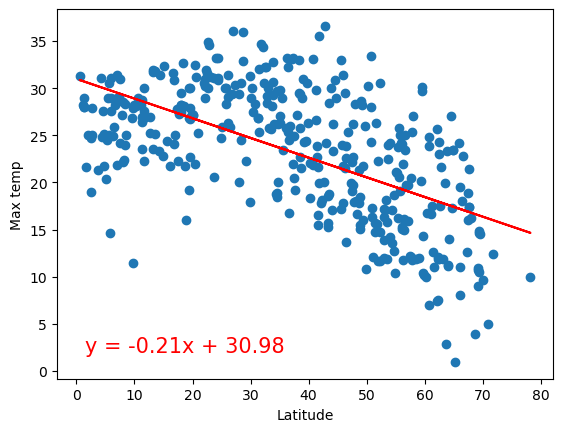

In [34]:
# Linear regression on Northern Hemisphere
plot_linear_regression_scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max temp")

The r-value is: 0.770075273390108


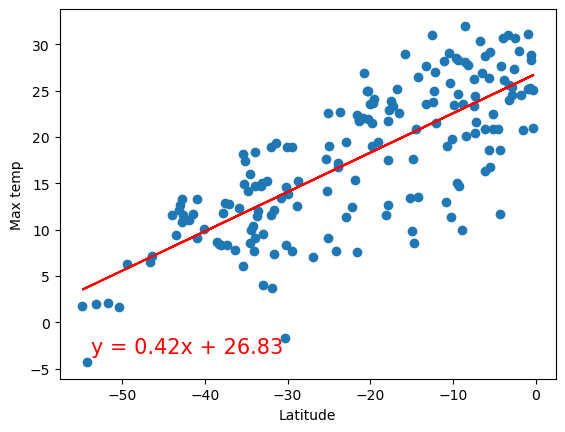

In [35]:
# Linear regression on Southern Hemisphere
plot_linear_regression_scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max temp")

**Discussion about the linear relationship:** positive correlation

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.06322988393037955


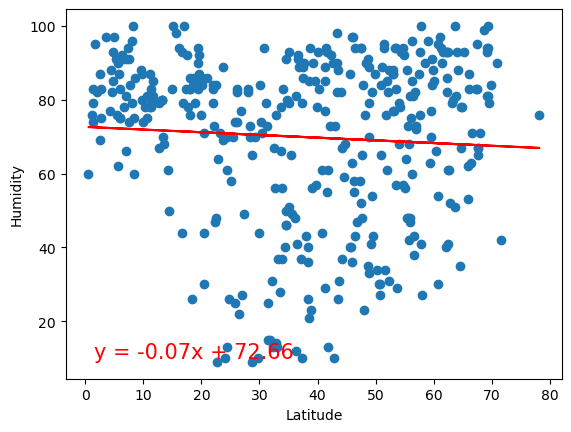

In [36]:
# Northern Hemisphere
plot_linear_regression_scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r-value is: -0.0288078407183419


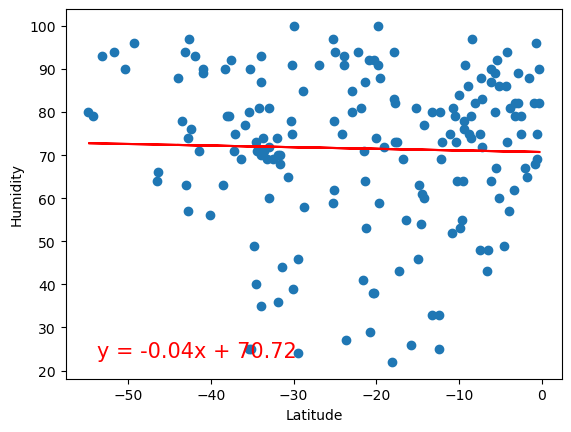

In [37]:
# Southern Hemisphere
plot_linear_regression_scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** no correlation

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.09277379940541595


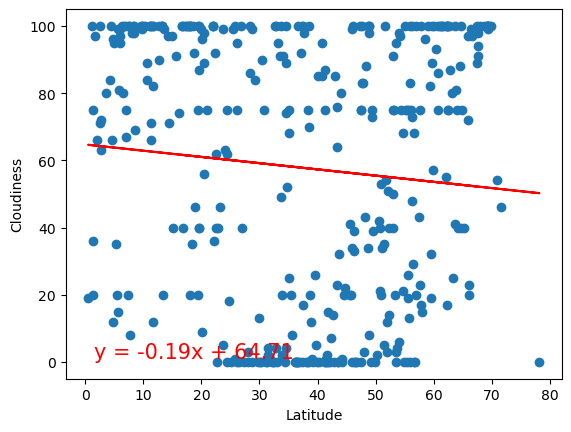

In [38]:
# Northern Hemisphere
plot_linear_regression_scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r-value is: -0.2538316822578907


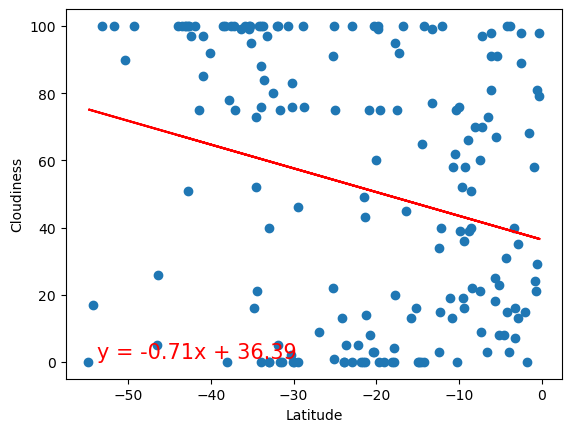

In [39]:
# Southern Hemisphere
plot_linear_regression_scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** no correlation

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.15411887427606724


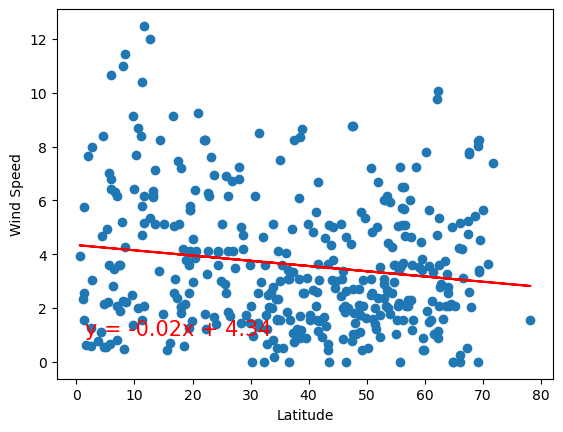

In [40]:
# Northern Hemisphere
plot_linear_regression_scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r-value is: -0.25439652832740606


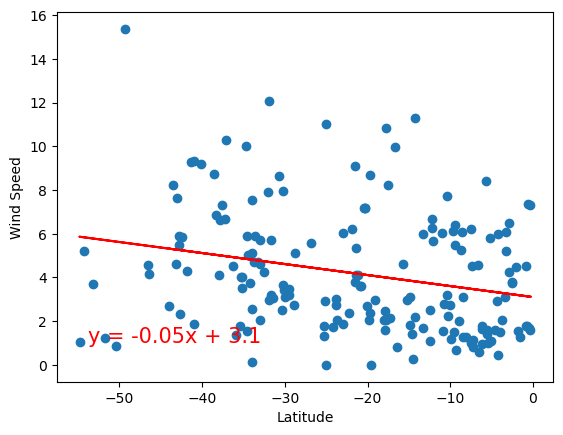

In [41]:
# Southern Hemisphere
plot_linear_regression_scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** no correlation